# Sfaira Metadata Tutorial

The following tutorial focuses on the extraction and visualization of metadata of Sfaira data zoos.
This is particularly interesting when trying to get an overview of the current state of single cell Genomics.
We will examine the Sfaira meta data to assemble all meta data panels presented in the Sfaira manuscript.

First we will import all required packages, set default parameters for plots and define the paths to the meta data.

In [1]:
# !mkdir panels

In [2]:
import glob
import os
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sfaira

plt.rcParams.update({
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
})

sc.settings.figdir = "panels/"

datadir = '.'
metadir = '.'
configdir = '.'

Ontology <class 'sfaira.versions.metadata.base.OntologyMondo'> is not a DAG, treat child-parent reasoning with care.
Ontology <class 'sfaira.versions.metadata.base.OntologyUberon'> is not a DAG, treat child-parent reasoning with care.


# Overview tables by organ

First, we will create summary tables by organ for mouse and human. We will use it later to create the overview plots.

In [3]:
summary_tab_human = pd.DataFrame(columns=["datasets", "cells", "organ"])
summary_tab_mouse = pd.DataFrame(columns=["datasets", "cells", "organ"])
for x in glob.glob(os.path.join(metadir,"*meta.csv")):
    species = x.split("/")[-1].split("_")[0]
    if x.split("/")[-1].split("_")[2][:2] == "20" or x.split("/")[-1].split("_")[2] == "unknown":
        organ = x.split("/")[-1].split("_")[1]
    else:
        organ = "_".join(x.split("/")[-1].split("_")[1:3])
    tab = pd.read_csv(x)
    #cell_count = cell_count + int(tab["ncells"].values)
    if species.lower() == "human":
       summary_tab_human = pd.concat([
            summary_tab_human, 
            pd.DataFrame({
                "datasets": 1.,
                "cells": int(tab["ncells"].values),
                "organ": organ
            }, index=[summary_tab_human.shape[0]])
        ])
    if species.lower() == "mouse":
       summary_tab_mouse = pd.concat([
            summary_tab_mouse, 
            pd.DataFrame({
                "datasets": 1.,
                "cells": int(tab["ncells"].values),
                "organ": organ
            }, index=[summary_tab_mouse.shape[0]])
        ])
summary_tab_human = summary_tab_human.groupby("organ")[["datasets", "cells"]].agg({'datasets':'sum','cells':'sum'})
summary_tab_human["organ"] = list(summary_tab_human.index)
summary_tab_human = pd.concat([
    summary_tab_human, 
    pd.DataFrame({
        "datasets": summary_tab_human.sum()["datasets"],
        "cells": summary_tab_human.sum()["cells"],
        "organ": "all"
    }, index=[summary_tab_human.shape[0]])
])
summary_tab_mouse = summary_tab_mouse.groupby("organ")[["datasets", "cells"]].agg({'datasets':'sum','cells':'sum'})
summary_tab_mouse["organ"] = list(summary_tab_mouse.index)
summary_tab_mouse = pd.concat([
    summary_tab_mouse, 
    pd.DataFrame({
        "datasets": summary_tab_mouse.sum()["datasets"],
        "cells": summary_tab_mouse.sum()["cells"],
        "organ": "all"
    }, index=[summary_tab_mouse.shape[0]])
])

In [4]:
display(summary_tab_human)

,datasets,cells,organ
None,3.0,5224040,None
blood,6.0,193368,blood
bonemarrow,4.0,8872,bonemarrow
brain,3.0,137619,brain
bronchus,1.0,16873,bronchus
caudatelobeofliver,1.0,8444,caudatelobeofliver
colon,2.0,45979,colon
colonicepithelium,1.0,34772,colonicepithelium
esophagus,1.0,87947,esophagus
ileum,2.0,34386,ileum


In [5]:
display(summary_tab_mouse)

,datasets,cells,organ
None,1.0,21966,None
adiposetissue,5.0,19175,adiposetissue
aorta,1.0,906,aorta
blood,6.0,7095,blood
bonemarrow,6.0,81730,bonemarrow
brain,7.0,31533,brain
colon,2.0,10198,colon
diaphragm,1.0,1858,diaphragm
heart,3.0,22230,heart
intestine,1.0,6076,intestine


# Overview tables by dataset

Next we will create reference tables by dataset for mouse and human for additional information in the following overview plots.

In [6]:
ref_tab_human = pd.DataFrame(columns=["organ", "cells", "protocol", "year"  "doi"])
ref_tab_mouse = pd.DataFrame(columns=["organ", "cells", "protocol", "year"  "doi"])
for x in glob.glob(os.path.join(metadir,"*meta.csv")):
    species = x.split("/")[-1].split("_")[0]
    if x.split("/")[-1].split("_")[2][:2] == "20" or x.split("/")[-1].split("_")[2] == "unknown":
        organ = x.split("/")[-1].split("_")[1]
    else:
        organ = "_".join(x.split("/")[-1].split("_")[1:3])
    tab = pd.read_csv(x)
    # cell_count = cell_count + int(tab["ncells"].values)
    if species.lower() == "human":
       ref_tab_human = pd.concat([
            ref_tab_human, 
            pd.DataFrame({
                "organ": tab["organ"].values[0].lower(),
                "cells": int(tab["ncells"].values),
                "protocol": tab["assay_sc"].values,
                "year": tab["year"].values,
                "doi": tab["id"].values[0].split("_")[-1]
            }, index=[summary_tab_human.shape[0]])
        ])
    if species.lower() == "mouse":
       ref_tab_mouse = pd.concat([
            ref_tab_mouse, 
            pd.DataFrame({
                "organ": tab["organ"].values[0].lower(),
                "cells": int(tab["ncells"].values),
                "protocol": tab["assay_sc"].values,
                "year": int(tab["year"].values),
                "doi": tab["id"].values[0].split("_")[-1]
            }, index=[summary_tab_mouse.shape[0]])
        ])
ref_tab_human = ref_tab_human[["organ", "cells", "protocol", "year", "doi"]]
ref_tab_human = ref_tab_human.iloc[np.argsort(ref_tab_human["organ"].values), :]
ref_tab_human.index = range(ref_tab_human.shape[0])
ref_tab_mouse = ref_tab_mouse[["organ", "cells", "protocol", "year", "doi"]]
ref_tab_mouse = ref_tab_mouse.iloc[np.argsort(ref_tab_mouse["organ"].values), :]
ref_tab_mouse.index = range(ref_tab_mouse.shape[0])

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ref_tab_human)

,organ,cells,protocol,year,doi
0,"('adipose tissue of abdominal region', 'adrena...",567216,microwell-seq,2020.0,10.1038/s41586-020-2157-4
1,"('bone marrow', 'umbilical cord blood')",593844,10x sequencing,2018.0,regev
2,"('eye', 'adrenal gland', 'cerebellum', 'telenc...",4062980,sci-RNA-seq,2020.0,10.1126/science.aba7721
3,blood,5411,10x sequencing,2019.0,10.1038/s41467-019-12464-3
4,blood,11769,10x sequencing,2019.0,genomics
5,blood,161764,10x sequencing,2020.0,10.1101/2020.10.12.335331
6,blood,4777,10x sequencing,2019.0,10.1038/s41467-019-12464-3
7,blood,4775,10x sequencing,2019.0,10.1038/s41467-019-12464-3
8,blood,4872,10x sequencing,2019.0,10.1038/s41467-019-12464-3
9,bone marrow,1918,10x sequencing,2019.0,10.1038/s41467-019-12464-3


In [8]:
# number of human publications in the sfaira database (need to add ica study and 10x genomics study to the number below - both have no publication associated)
len(ref_tab_human["doi"].unique())

37

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ref_tab_mouse)

,organ,cells,protocol,year,doi
0,"('brain', 'choroid plexus', 'dura mater', 'bra...",21966,10x sequencing,2019.0,10.1038/s41593-019-0393-4
1,adipose tissue,2223,Smart-seq2,2019.0,10.1101/661728
2,adipose tissue,3406,Smart-seq2,2019.0,10.1101/661728
3,adipose tissue,6777,10x sequencing,2019.0,10.1101/661728
4,adipose tissue,3014,Smart-seq2,2019.0,10.1101/661728
5,adipose tissue,3755,Smart-seq2,2019.0,10.1101/661728
6,aorta,906,Smart-seq2,2019.0,10.1101/661728
7,blood,135,microwell-seq,2018.0,10.1016/j.cell.2018.02.001
8,blood,3201,microwell-seq,2018.0,10.1016/j.cell.2018.02.001
9,blood,2466,microwell-seq,2018.0,10.1016/j.cell.2018.02.001


In [10]:
# number of mouse publications in the sfaira database
len(ref_tab_mouse["doi"].unique())

4

# Data and cell overview plot

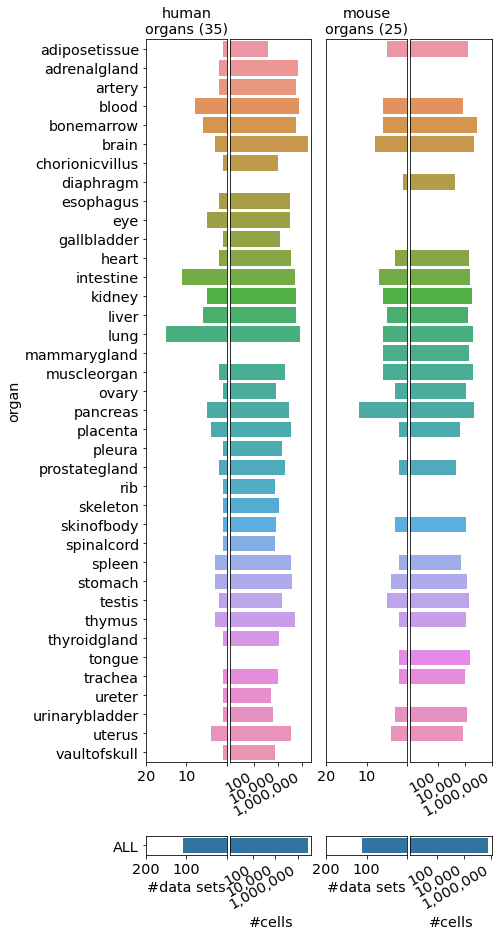

    organ  datasets
ALL   ALL      -109
    organ    cells  logcells
ALL   ALL  7407265  6.869658
    organ  datasets
ALL   ALL      -111
    organ   cells  logcells
ALL   ALL  564757  5.751862


In [29]:
import os
import pickle
import numpy as np

allorgans = []
for f in os.listdir(configdir):
    allorgans.append(f.split("_")[2][:-7])
allorgans = sorted(set(allorgans))

datadict = {"mouse": dict(), "human": dict()}
for o in allorgans:
    datadict["human"][o] = {"ndatasets": 0, "ncells": 0}
    datadict["mouse"][o] = {"ndatasets": 0, "ncells": 0}

for f in os.listdir(configdir):
    organism = f.split("_")[1]
    organ = f.split("_")[2][:-7]
    ndatasets = 0
    ncells = 0
    with open(os.path.join(configdir+f), "rb") as pf:
        config = pickle.load(pf)
        for k, v in config.items():
            datadict[organism][organ]["ndatasets"] += 1
            datadict[organism][organ]["ncells"] += len(v)
    datadict[organism][organ]["logncells"] = np.log(datadict[organism][organ]["ncells"]) / np.log(10)
    
sns_data_mouse_cells = pd.DataFrame({
    "organ": [k for k, v in datadict["mouse"].items()],
    "cells": [v["ncells"] for k, v in datadict["mouse"].items()],
    "logcells": [v["logncells"] if "logncells" in v.keys() else 0 for k, v in datadict["mouse"].items()],
}, index=[k for k, v in datadict["mouse"].items()])
sns_data_mouse_datasets = pd.DataFrame({
    "organ": [k for k, v in datadict["mouse"].items()],
    "datasets": [-v["ndatasets"] for k, v in datadict["mouse"].items()],
}, index=[k for k, v in datadict["mouse"].items()])

sns_data_human_cells = pd.DataFrame({
    "organ": [k for k, v in datadict["human"].items()],
    "cells": [v["ncells"] for k, v in datadict["human"].items()],
    "logcells": [v["logncells"] if "logncells" in v.keys() else 0 for k, v in datadict["human"].items()],
}, index=[k for k, v in datadict["human"].items()])
sns_data_human_datasets = pd.DataFrame({
    "organ": [k for k, v in datadict["human"].items()],
    "datasets": [-v["ndatasets"] for k, v in datadict["human"].items()],
}, index=[k for k, v in datadict["human"].items()])

all_organs = np.sort(np.unique(np.concatenate([
    sns_data_human_cells["organ"].values,
    sns_data_mouse_cells["organ"].values
])))
sns_data_human_datasets_merged = sns_data_human_datasets.reindex(all_organs)
sns_data_human_datasets_merged["organ"] = sns_data_human_datasets_merged.index
sns_data_human_cells_merged = sns_data_human_cells.reindex(all_organs)
sns_data_human_cells_merged["organ"] = sns_data_human_cells_merged.index
sns_data_mouse_datasets_merged = sns_data_mouse_datasets.reindex(all_organs)
sns_data_mouse_datasets_merged["organ"] = sns_data_mouse_datasets_merged.index
sns_data_mouse_cells_merged = sns_data_mouse_cells.reindex(all_organs)
sns_data_mouse_cells_merged["organ"] = sns_data_mouse_cells_merged.index

sns_data_mouse_datasets_all = pd.DataFrame({
    "organ": "ALL", 
    "datasets": - np.sum([v["ndatasets"] for k, v in datadict["mouse"].items()]),
}, index=["ALL"])
sns_data_mouse_cells_all = pd.DataFrame({
    "organ": "ALL", 
    "cells": np.sum([v["ncells"] for k, v in datadict["mouse"].items()]),
    "logcells": np.log(np.sum([v["ncells"] for k, v in datadict["mouse"].items()])) / np.log(10),
}, index=["ALL"])

sns_data_human_datasets_all = pd.DataFrame({
    "organ": "ALL", 
    "datasets": - np.sum([v["ndatasets"] for k, v in datadict["human"].items()]),
}, index=["ALL"])
sns_data_human_cells_all = pd.DataFrame({
    "organ": "ALL", 
    "cells": np.sum([v["ncells"] for k, v in datadict["human"].items()]),
    "logcells": np.log(np.sum([v["ncells"] for k, v in datadict["human"].items()])) / np.log(10),
}, index=["ALL"])

fig, axs = plt.subplots(
    nrows=2, ncols=5, 
    figsize=(8,15), 
    gridspec_kw={
        "width_ratios": [5, 5, 0.5, 5, 5],
        "height_ratios": [len(all_organs), 1]
    }
)
sns.barplot(data=sns_data_human_datasets_merged, y="organ", x="datasets", ax=axs[0, 0])
sns.barplot(data=sns_data_human_cells_merged, y="organ", x="logcells", ax=axs[0, 1])
axs[0, 0].set_ylabel('organ')
axs[0, 1].set_ylabel(' ')
axs[0, 0].set_xlabel(' ')
axs[0, 1].set_xlabel(' ')
axs[0, 1].set_yticks([])
axs[0, 0].set_title(f'human\norgans ({np.sum(sns_data_human_cells_merged["cells"].values > 0)})')
axs[0, 1].set_title(' ')
axs[0, 0].set(
    xticks=axs[0, 0].get_xticks(), 
    xticklabels=[int(x) if i < len(axs[0, 0].get_xticks()) - 1 
                 else " " for i, x in enumerate(-axs[0, 0].get_xticks())]
)
axs[0, 1].set_xticks(np.array([2, 4, 6]))
axs[0, 1].set_xticklabels(
    labels=[
        "100" if x == 2
        else "10,000" if x == 4
        else "1,000,000" if x == 6
        else "100,000,000" if x == 8
        else " "
        for x in axs[0, 1].get_xticks()
    ],
    rotation=30, 
    ha="right"
)
sns.barplot(data=sns_data_mouse_datasets_merged, y="organ", x="datasets", ax=axs[0, 3])
sns.barplot(data=sns_data_mouse_cells_merged, y="organ", x="logcells", ax=axs[0, 4])
axs[0, 3].set_ylabel(' ')
axs[0, 4].set_ylabel(' ')
axs[0, 3].set_xlabel(' ')
axs[0, 4].set_xlabel(' ')
axs[0, 3].set_yticks([])
axs[0, 4].set_yticks([])
axs[0, 3].set_title(f'mouse\norgans ({np.sum(sns_data_mouse_cells_merged["cells"].values > 0)})')
axs[0, 4].set_title(' ')
axs[0, 3].set(
    xticks=axs[0, 3].get_xticks(), 
    xticklabels=[int(x) if i < len(axs[0, 3].get_xticks()) - 1 
                 else " " for i, x in enumerate(-axs[0, 3].get_xticks())]
)
axs[0, 4].set_xticks(np.array([2, 4, 6]))
axs[0, 4].set_xticklabels(
    labels=[
        "100" if x == 2
        else "10,000" if x == 4
        else "1,000,000" if x == 6
        else "100,000,000" if x == 8
        else " "
        for x in axs[0, 4].get_xticks()
    ],
    rotation=30, 
    ha="right"
)
sns.barplot(data=sns_data_human_datasets_all, y="organ", x="datasets", ax=axs[1, 0])
sns.barplot(data=sns_data_human_cells_all, y="organ", x="logcells", ax=axs[1, 1])
axs[1, 0].set_ylabel(' ')
axs[1, 1].set_ylabel(' ')
axs[1, 0].set_xlabel('#data sets')
axs[1, 1].set_xlabel('#cells')
axs[1, 1].set_yticks([])
axs[1, 0].set(
    xticks=axs[1, 0].get_xticks(), 
    xticklabels=[int(x) if i < len(axs[1, 0].get_xticks()) - 1  
                 else " " for i, x in enumerate(-axs[1, 0].get_xticks())]
)

axs[1, 1].set_xticks(np.array([2, 4, 6]))
axs[1, 1].set_xticklabels(
    labels=[
        "100" if x == 2
        else "10,000" if x == 4
        else "1,000,000" if x == 6
        else "100,000,000" if x == 8
        else " "
        for x in axs[1, 1].get_xticks()
    ],
    rotation=30, 
    ha="right"
)
sns.barplot(data=sns_data_mouse_datasets_all, y="organ", x="datasets", ax=axs[1, 3])
sns.barplot(data=sns_data_mouse_cells_all, y="organ", x="logcells", ax=axs[1, 4])
axs[1, 3].set_ylabel(' ')
axs[1, 4].set_ylabel(' ')
axs[1, 3].set_xlabel('#data sets')
axs[1, 4].set_xlabel('#cells')
axs[1, 3].set_yticks([])
axs[1, 4].set_yticks([])
axs[1, 3].set(
    xticks=axs[1, 3].get_xticks(), 
    xticklabels=[int(x) if i < len(axs[1, 3].get_xticks()) - 1 
                 else " " for i, x in enumerate(-axs[1, 3].get_xticks())]
)
axs[1, 4].set_xticks(np.array([2, 4, 6]))
axs[1, 4].set_xticklabels(
    labels=[
        "100" if x == 2
        else "10,000" if x == 4
        else "1,000,000" if x == 6
        else "100,000,000" if x == 8
        else " "
        for x in axs[1, 4].get_xticks()
    ],
    rotation=30, 
    ha="right"
)
axs[0, 2].set_visible(False)
axs[1, 2].set_visible(False)
plt.subplots_adjust(wspace=0.05, hspace=0.2, left=0.3)
plt.savefig(os.path.join(sc.settings.figdir, "fig1b.pdf"), bbox_inches="tight")
plt.show()

print(sns_data_human_datasets_all)
print(sns_data_human_cells_all)
print(sns_data_mouse_datasets_all)
print(sns_data_mouse_cells_all)

# Explorative statistics

In [12]:
store = sfaira.data.load_store(datadir, store_format="h5ad")

Discovered mouse_placenta_2018_microwellseq_han_052.h5ad as .h5ad file.
Discovered mouse_thymus_2019_10xsequencing_pisco_034.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_10xsequencing_pisco_026.h5ad as .h5ad file.
Discovered human_colonicepithelium_2019_10xsequencing_smilie_001.h5ad as .h5ad file.
Discovered human_testis_2018_10xsequencing_guo_001.h5ad as .h5ad file.
Discovered mouse_heart_2019_10xsequencing_pisco_015.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_005.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_048.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_001.h5ad as .h5ad file.
Discovered mouse_intestine_2018_microwellseq_han_010.h5ad as .h5ad file.
Discovered mouse_brain_2018_microwellseq_han_006.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_050.h5ad as .h5ad file.
Discovered human_placenta_2018_smartseq2_ventotormo_002.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq

Discovered mouse_bonemarrow_2019_10xsequencing_pisco_008.h5ad as .h5ad file.
Discovered mouse_prostategland_2018_microwellseq_han_055.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq_han_064.h5ad as .h5ad file.
Discovered human_retina_2019_10xsequencing_voigt_001.h5ad as .h5ad file.
Discovered mouse_kidney_2019_smartseq2_pisco_019.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_002.h5ad as .h5ad file.
Discovered human_lung_2020_10xsequencing_miller_001.h5ad as .h5ad file.
Discovered human_blood_2019_10xsequencing_szabo_013.h5ad as .h5ad file.
Discovered human_rectum_2019_10xsequencing_wang_003.h5ad as .h5ad file.
Discovered mouse_lung_2018_microwellseq_han_014.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_002.h5ad as .h5ad file.
Discovered human_lung_2019_10xsequencing_szabo_008.h5ad as .h5ad file.
Discovered mouse_brain_2019_smartseq2_pisco_010.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_smartseq2_pisco_027.h5ad 

In [13]:
from tqdm import tqdm
def load_celltype_freqs():
    tab = []
    for i, (k, v) in enumerate(tqdm(store.adata_by_key.items())):
        v = v.to_memory()
        organism = np.unique(v.obs["organism"].values).tolist()
        assay_sc = np.unique(v.obs["assay_sc"].values).tolist()
        tab.append(pd.DataFrame({
            "dataset": k,
            "species": organism[0] if len(organism) == 1 else [organism],
            "protocol": assay_sc[0] if len(assay_sc) == 1 else [assay_sc],
            "organ": [np.unique(v.obs["organ"].values).tolist()],
            "mean_total_counts": np.asarray(v.X.sum(axis=1).mean()).flatten()[0]
        }))
    tab = pd.concat(tab, axis=0)
    return tab

In [14]:
df = load_celltype_freqs()
df['log10_mean_total_counts'] = np.log10(df['mean_total_counts'].values)

100%|██████████| 176/176 [01:51<00:00,  1.58it/s]


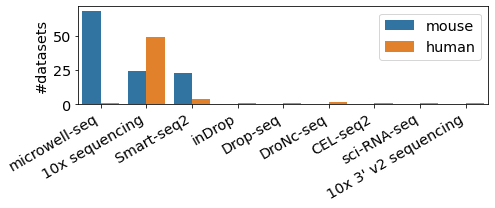

In [23]:
sns.countplot(data=df,x='protocol', hue='species');
fig=plt.gcf()
fig.set_size_inches((7,3))
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('#datasets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(sc.settings.figdir, "fig2f.pdf"), bbox_inches="tight")
plt.show()

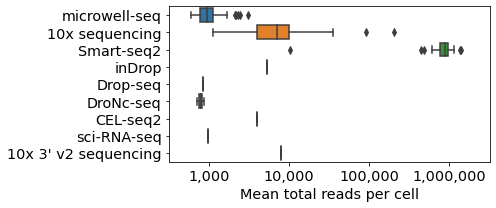

In [22]:
sns.boxplot(data=df, x='log10_mean_total_counts', y='protocol')
fig=plt.gcf()
fig.set_size_inches((7,3))
ax = plt.gca()
ax.set_xlabel('Mean total reads per cell')
ax.set_ylabel('')
ax.set_xlim((2.5,6.5))
ax.set_xticks(np.array([3, 4, 5, 6]))
ax.set_xticklabels(
    labels=[
        "100" if x == 2
        else "1,000" if x == 3
        else "10,000" if x == 4
        else "100,000" if x == 5
        else "1,000,000" if x == 6
        else " "
        for x in ax.get_xticks()
    ]
)
plt.tight_layout()
plt.savefig(os.path.join(sc.settings.figdir, "fig2g.pdf"), bbox_inches="tight")
plt.show()

## Organ-centric

In [17]:
from tqdm import tqdm
allorgans = []
for f in os.listdir(configdir):
    allorgans.append(f.split("_")[2][:-7])
allorgans = sorted(set(allorgans))

datadict = {"mouse": dict(), "human": dict()}
for o in allorgans:
    datadict["human"][o] = {"ndatasets": 0, "ncells": 0, "celltypes": set()}
    datadict["mouse"][o] = {"ndatasets": 0, "ncells": 0, "celltypes": set()}
framedict = {}
store = sfaira.data.load_store(datadir, store_format="h5ad")

for f in tqdm(os.listdir(configdir)):
    organism = f.split("_")[1]
    organ = f.split("_")[2][:-7]
    store.load_config(os.path.join(configdir, f))
    for k, v in store.adata_sliced.items():
        datadict[organism][organ]["ndatasets"] += 1
        datadict[organism][organ]["ncells"] += v.n_obs
        if v.obs["annotated"].values.all():
            datadict[organism][organ]["celltypes"] |= set(v.obs["cell_ontology_class"].unique().tolist())
        meancounts = v.X.sum(axis=1).mean()
        framedict[k] = {"id": k, "organism": organism, "organ": organ, "meancounts": meancounts, "log10meancounts": np.log10(meancounts)}
    datadict[organism][organ]["celltypes"] -= set(["UNKNOWN"])

Discovered mouse_placenta_2018_microwellseq_han_052.h5ad as .h5ad file.
Discovered mouse_thymus_2019_10xsequencing_pisco_034.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_10xsequencing_pisco_026.h5ad as .h5ad file.
Discovered human_colonicepithelium_2019_10xsequencing_smilie_001.h5ad as .h5ad file.
Discovered human_testis_2018_10xsequencing_guo_001.h5ad as .h5ad file.
Discovered mouse_heart_2019_10xsequencing_pisco_015.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_005.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_048.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_001.h5ad as .h5ad file.
Discovered mouse_intestine_2018_microwellseq_han_010.h5ad as .h5ad file.
Discovered mouse_brain_2018_microwellseq_han_006.h5ad as .h5ad file.
Discovered mouse_blood_2018_microwellseq_han_050.h5ad as .h5ad file.
Discovered human_placenta_2018_smartseq2_ventotormo_002.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq

Discovered mouse_bonemarrow_2019_10xsequencing_pisco_008.h5ad as .h5ad file.
Discovered mouse_prostategland_2018_microwellseq_han_055.h5ad as .h5ad file.
Discovered mouse_testis_2018_microwellseq_han_064.h5ad as .h5ad file.
Discovered human_retina_2019_10xsequencing_voigt_001.h5ad as .h5ad file.
Discovered mouse_kidney_2019_smartseq2_pisco_019.h5ad as .h5ad file.
Discovered mouse_pancreas_2019_10xsequencing_thompson_002.h5ad as .h5ad file.
Discovered human_lung_2020_10xsequencing_miller_001.h5ad as .h5ad file.
Discovered human_blood_2019_10xsequencing_szabo_013.h5ad as .h5ad file.
Discovered human_rectum_2019_10xsequencing_wang_003.h5ad as .h5ad file.
Discovered mouse_lung_2018_microwellseq_han_014.h5ad as .h5ad file.
Discovered mouse_bonemarrow_2018_microwellseq_han_002.h5ad as .h5ad file.
Discovered human_lung_2019_10xsequencing_szabo_008.h5ad as .h5ad file.
Discovered mouse_brain_2019_smartseq2_pisco_010.h5ad as .h5ad file.
Discovered mouse_muscleorgan_2019_smartseq2_pisco_027.h5ad 

100%|██████████| 60/60 [35:29<00:00, 35.49s/it] 


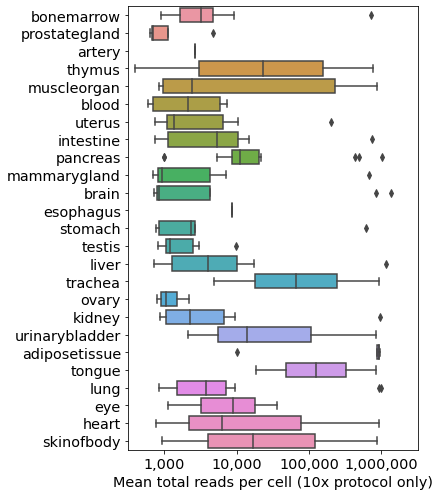

In [26]:
df = pd.DataFrame(framedict).T
df.loc[["10x" in i for i in df.index]]
sns.boxplot(data=df, x='log10meancounts', y='organ')
fig=plt.gcf()
fig.set_size_inches((6,7))
ax = plt.gca()
ax.set_xlabel('Mean total reads per cell (10x protocol only)')
ax.set_ylabel('')
ax.set_xlim((2.5,6.5))
ax.set_xticks(np.array([3, 4, 5, 6]))
ax.set_xticklabels(
    labels=[
        "100" if x == 2
        else "1,000" if x == 3
        else "10,000" if x == 4
        else "100,000" if x == 5
        else "1,000,000" if x == 6
        else " "
        for x in ax.get_xticks()
    ]
)
plt.tight_layout()
plt.savefig(os.path.join(sc.settings.figdir, "fig2e.pdf"), bbox_inches="tight")
plt.show()

<ipython-input-28-8af3f20565bd>:4: RuntimeWarning: divide by zero encountered in log10
  df = df.append({"Organism": organism, "organ": organ, "number of cells": np.log10(datadict[organism][organ]["ncells"]), "number of celltypes": len(datadict[organism][organ]["celltypes"]), "Datasets": datadict[organism][organ]["ndatasets"]}, ignore_index=True)


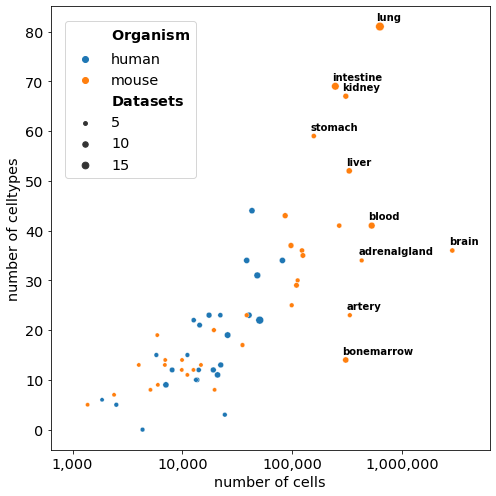

In [28]:
df = pd.DataFrame({"Organism":[], "organ":[], "number of cells":[], "number of celltypes": [], "Datasets": []})
for organism in datadict.keys():
    for organ in datadict[organism].keys():
        df = df.append({"Organism": organism, "organ": organ, "number of cells": np.log10(datadict[organism][organ]["ncells"]), "number of celltypes": len(datadict[organism][organ]["celltypes"]), "Datasets": datadict[organism][organ]["ndatasets"]}, ignore_index=True)
df = df[df["Datasets"] > 0]
df.index = df["organ"].tolist()

p1 = sns.scatterplot(data=df, x="number of cells", y="number of celltypes", hue="Organism", size="Datasets")

for line in range(0,df.shape[0]):
    if ((df["number of cells"][line] > 5.2) or (df["number of celltypes"][line] > 46)) and df["organ"][line] != "thymus":
        p1.text(df["number of cells"][line]-0.03, df["number of celltypes"][line]+1.2, df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

fig = plt.gcf()
fig.set_size_inches(7, 7)

ax = plt.gca()
#ax.set_xlabel('#cells')
#ax.set_ylabel('#cell-types')
ax.set_xlim((2.8,6.8))
ax.set_xticks(np.array([3, 4, 5, 6]))
ax.set_xticklabels(
    labels=[
        "1,000" if x == 3
        else "10,000" if x == 4
        else "100,000" if x == 5
        else "1,000,000" if x == 6
        else " "
        for x in ax.get_xticks()
    ]
)

handles, labels = ax.get_legend_handles_labels()
#handles = handles[:4] + handles[5:6] + handles[7:8] + handles[9:10]
handles = handles[:7]
sizes = [15,30,45]
for i,h in enumerate(handles[4:]):
    h.set_sizes([sizes[i]])
labels = ['$\\bf{Organism}$', 'human', 'mouse', '$\\bf{Datasets}$', '5', '10', '15']
plt.legend(handles, labels, loc='upper left', borderaxespad=1)
plt.tight_layout()
plt.savefig(os.path.join(sc.settings.figdir, "fig2c.pdf"), bbox_inches="tight")
plt.show()